In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df=pd.read_csv(r'NIFTY 50.csv')
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,01 Oct 2024,25788.45,25907.6,25739.2,25796.90
1,NIFTY 50,30 Sep 2024,26061.3,26134.7,25794.1,25810.85
2,NIFTY 50,27 Sep 2024,26248.25,26277.35,26151.4,26178.95
3,NIFTY 50,26 Sep 2024,26005.4,26250.9,25998.4,26216.05
4,NIFTY 50,25 Sep 2024,25899.45,26032.8,25871.35,26004.15
...,...,...,...,...,...,...
8313,NIFTY 50,10 Jul 1990,-,-,-,288.69
8314,NIFTY 50,09 Jul 1990,-,-,-,289.69
8315,NIFTY 50,06 Jul 1990,-,-,-,289.04
8316,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [ ]:
## Now we removing unwanted columns and considering only on column as output that is Close column

In [ ]:
df=df.drop(['Index Name','Open','High','Low'],axis=1)
df.head()

,Date,Close
0,01 Oct 2024,25796.90
1,30 Sep 2024,25810.85
2,27 Sep 2024,26178.95
3,26 Sep 2024,26216.05
4,25 Sep 2024,26004.15


In [ ]:
df_rev = df.iloc[::-1].reset_index(drop=True)  # Reverse and reset index
df_rev.head()

,Date,Close
0,03 Jul 1990,279.02
1,05 Jul 1990,284.04
2,06 Jul 1990,289.04
3,09 Jul 1990,289.69
4,10 Jul 1990,288.69


## Moving Average 100

In [ ]:
# finding 100 moving average 
ma100=df_rev.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
8313    24059.0185
8314    24096.7520
8315    24135.5165
8316    24170.6000
8317    24208.9940
Name: Close, Length: 8318, dtype: float64

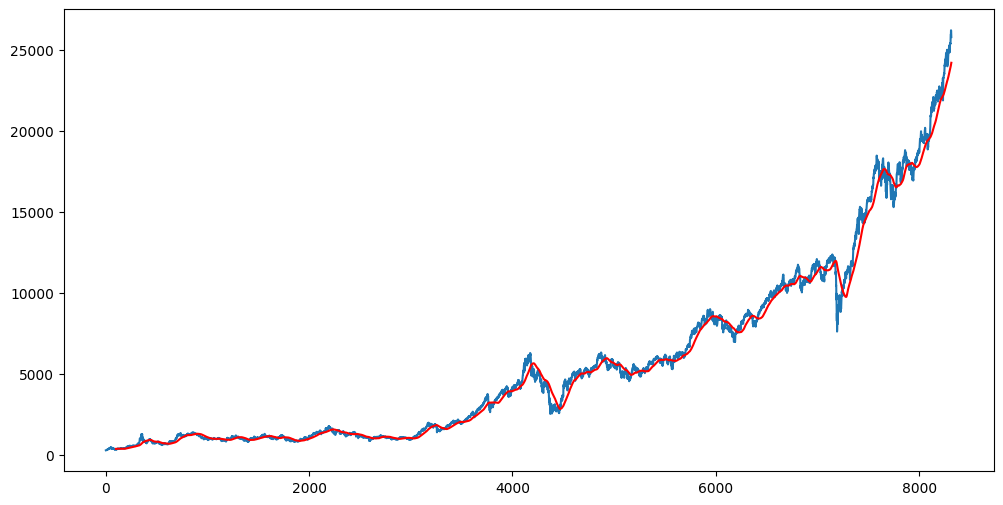

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_rev.Close)
plt.plot(ma100,'red')
plt.show()

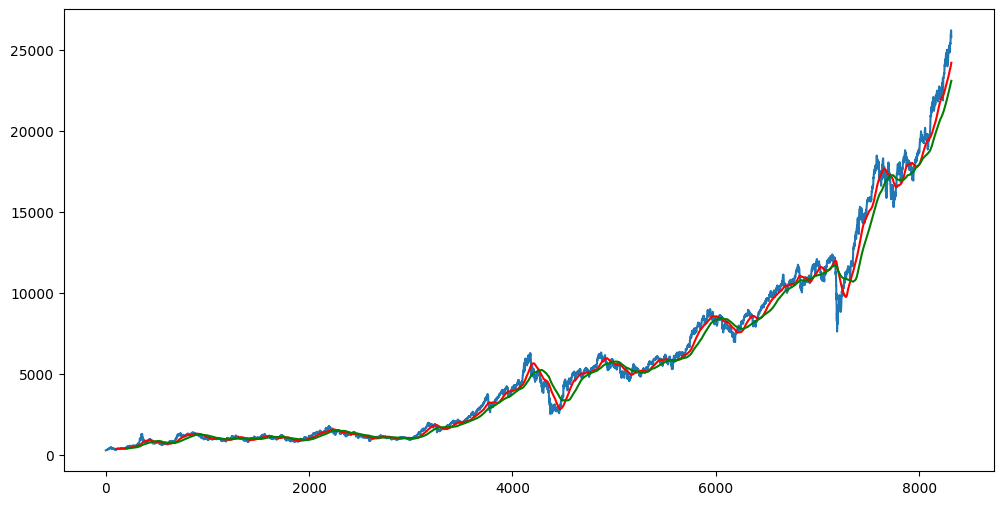

In [ ]:
# finding 200 moving average 
ma200=df_rev.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df_rev.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'g')
plt.show()

In [ ]:
data=df_rev.head()

In [ ]:
data

,Date,Close
0,03 Jul 1990,279.02
1,05 Jul 1990,284.04
2,06 Jul 1990,289.04
3,09 Jul 1990,289.69
4,10 Jul 1990,288.69


## Data Splitting

In [ ]:
df_train= pd.DataFrame(df_rev['Close'][0:int(len(df_rev)*0.70)])
df_test = pd.DataFrame(df_rev['Close'][int(len(df_rev)*0.70):int(len(df_rev))])

print(df_train.shape)
print(df_test.shape)

(5822, 1)
(2496, 1)


In [ ]:
# Scale down the data
from sklearn.preprocessing import MinMaxScaler       # import lib
scaler = MinMaxScaler(feature_range=(0,1)) 
df_train_arr= scaler.fit_transform(df_train)
df_train_arr

array([[0.00000000e+00],
       [6.54043539e-04],
       [1.30548133e-03],
       ...,
       [9.93537737e-01],
       [9.97615738e-01],
       [1.00000000e+00]])

In [ ]:
x_train = []
y_train = []

for i in range(100,df_train_arr.shape[0]):        # df_train_arr[101:1]   # here we take only from df_train
    x_train.append(df_train_arr[i-100: i])
    y_train.append(df_train_arr[i,0])
    
x_train

[array([[0.        ],
        [0.00065404],
        [0.00130548],
        [0.00139017],
        [0.00125988],
        [0.00186051],
        [0.00223964],
        [0.00225658],
        [0.00116477],
        [0.00213281],
        [0.00250282],
        [0.00292886],
        [0.00307088],
        [0.00556849],
        [0.00580561],
        [0.00659646],
        [0.00891427],
        [0.00759186],
        [0.00683098],
        [0.00561409],
        [0.00608052],
        [0.00707852],
        [0.00911492],
        [0.00916834],
        [0.00898593],
        [0.00966343],
        [0.01102754],
        [0.01184705],
        [0.01161123],
        [0.01377921],
        [0.0137284 ],
        [0.01379224],
        [0.01577001],
        [0.01669114],
        [0.01478112],
        [0.01443586],
        [0.01530749],
        [0.01629767],
        [0.01720968],
        [0.01863764],
        [0.01760706],
        [0.01530618],
        [0.01773995],
        [0.01829758],
        [0.01853992],
        [0

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)
print(np.array(x_train))

[[[0.00000000e+00]
  [6.54043539e-04]
  [1.30548133e-03]
  ...
  [4.60436229e-03]
  [5.89811774e-03]
  [7.27134859e-03]]

 [[6.54043539e-04]
  [1.30548133e-03]
  [1.39016824e-03]
  ...
  [5.89811774e-03]
  [7.27134859e-03]
  [7.94232952e-03]]

 [[1.30548133e-03]
  [1.39016824e-03]
  [1.25988068e-03]
  ...
  [7.27134859e-03]
  [7.94232952e-03]
  [7.71172054e-03]]

 ...

 [[8.36039623e-01]
  [8.37121010e-01]
  [8.39316355e-01]
  ...
  [9.91759312e-01]
  [9.94638667e-01]
  [9.93739683e-01]]

 [[8.37121010e-01]
  [8.39316355e-01]
  [8.43420413e-01]
  ...
  [9.94638667e-01]
  [9.93739683e-01]
  [9.93537737e-01]]

 [[8.39316355e-01]
  [8.43420413e-01]
  [8.41277183e-01]
  ...
  [9.93739683e-01]
  [9.93537737e-01]
  [9.97615738e-01]]]


## Model Building

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [ ]:
model = Sequential()
model.add(LSTM(units =50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))                      # working on 1 column last one(close column) 
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units =60,activation='relu',return_sequences=True))                     
model.add(Dropout(0.3))

# third layer
model.add(LSTM(units =80,activation='relu',return_sequences=True))                     
model.add(Dropout(0.4))

# last layer
model.add(LSTM(units =120,activation='relu'))                     
model.add(Dropout(0.5))

# DENSE LAYER
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

model.compile(optimizer='adam',loss='mean_squared_error')    # loss for classification is categorical/binary cross entropy
model.fit(x_train,y_train,epochs=16)

In [ ]:
model.save('model/keras_model.h5')


Epoch 1/50
6593/6593 [==============================] - 10s 2ms/step - loss: 0.0066
Epoch 2/50
6593/6593 [==============================] - 8s 1ms/step - loss: 8.7989e-04
Epoch 3/50
6593/6593 [==============================] - 8s 1ms/step - loss: 7.1754e-04
Epoch 4/50
6593/6593 [==============================] - 8s 1ms/step - loss: 6.8355e-04
Epoch 5/50
6593/6593 [==============================] - 8s 1ms/step - loss: 5.1796e-04
Epoch 6/50
6593/6593 [==============================] - 8s 1ms/step - loss: 4.9687e-04
Epoch 7/50
6593/6593 [==============================] - 8s 1ms/step - loss: 4.6255e-04
Epoch 8/50
6593/6593 [==============================] - 9s 1ms/step - loss: 4.0332e-04
Epoch 9/50
6593/6593 [==============================] - 9s 1ms/step - loss: 3.6754e-04
Epoch 10/50
6593/6593 [==============================] - 9s 1ms/step - loss: 3.9015e-04
Epoch 11/50
6593/6593 [==============================] - 9s 1ms/step - loss: 3.7798e-04
Epoch 12/50
6593/6593 [====================

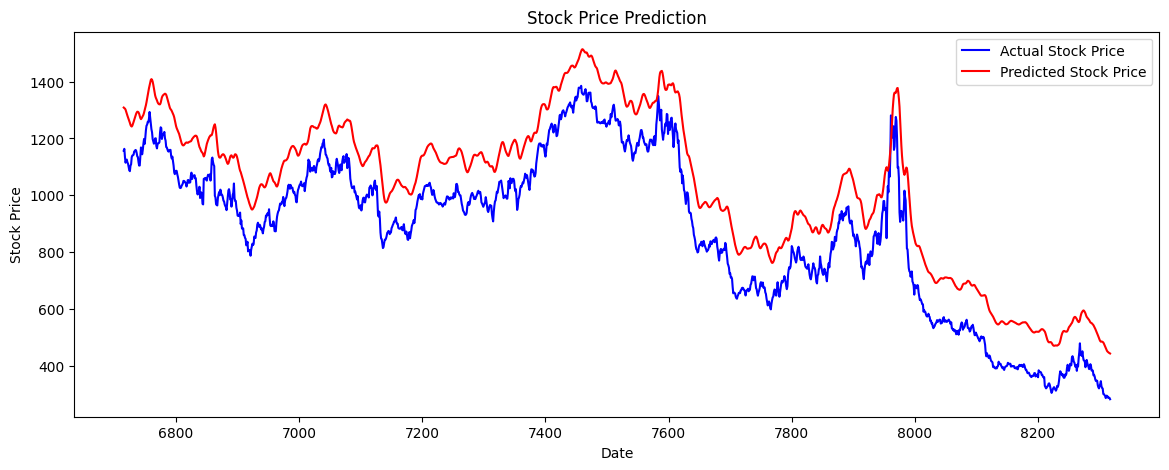

[[ 441.21915]
 [ 457.6987 ]
 [ 484.6706 ]
 [ 517.48145]
 [ 553.5115 ]
 [ 591.30945]
 [ 630.07886]
 [ 669.3827 ]
 [ 708.9803 ]
 [ 748.7321 ]
 [ 788.55444]
 [ 828.3918 ]
 [ 868.2057 ]
 [ 907.96515]
 [ 947.64764]
 [ 987.2323 ]
 [1026.704  ]
 [1066.0514 ]
 [1105.2633 ]
 [1144.3341 ]
 [1183.2562 ]
 [1222.0267 ]
 [1260.6432 ]
 [1299.1033 ]
 [1337.4059 ]
 [1375.5521 ]
 [1413.54   ]
 [1451.3711 ]
 [1489.0463 ]
 [1526.5653 ]
 [1563.9303 ]
 [1601.1414 ]
 [1638.1998 ]
 [1675.1066 ]
 [1711.8623 ]
 [1748.4688 ]
 [1784.9265 ]
 [1821.2365 ]
 [1857.3995 ]
 [1893.4167 ]
 [1929.2897 ]
 [1965.018  ]
 [2000.603  ]
 [2036.0459 ]
 [2071.3472 ]
 [2106.508  ]
 [2141.5293 ]
 [2176.4111 ]
 [2211.1548 ]
 [2245.761  ]
 [2280.2305 ]
 [2314.5647 ]
 [2348.763  ]
 [2382.8271 ]
 [2416.7576 ]
 [2450.5552 ]
 [2484.2202 ]
 [2517.7542 ]
 [2551.1575 ]
 [2584.4302 ]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# 2. Preprocess the data (Use only the 'Close' column for prediction)
data = df['Close'].values.reshape(-1, 1)
# 3. Normalize the data (LSTM performs better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
# 4. Prepare the training and testing data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)
# Reshape the data for the LSTM model
time_step = 60  # LSTM will look at the last 60 days to predict the next
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be [samples, time_steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 5. Build the LSTM Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Prediction of the next stock price
# 6. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# 7. Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)
# 8. Predict the stock prices for the test data
predicted_stock_price = model.predict(X_test)
# 9. Undo the scaling to bring predicted prices back to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# 10. Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(predicted_stock_price):], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# 11. Predict for the next 60 days
last_60_days = scaled_data[-60:]  # Take the last 60 days from the original dataset
X_next = [last_60_days]
# Reshape the input for LSTM (same format as training data)
X_next = np.array(X_next).reshape(1, 60, 1)
# Predict the next day stock price
predicted_price_60_days = []
for i in range(60):
    next_price = model.predict(X_next)
    predicted_price_60_days.append(next_price)
    # Update the X_next input by removing the first element and adding the predicted next price
    X_next = np.append(X_next[:, 1:, :], next_price.reshape(1, 1, 1), axis=1)
# Convert predictions back to original scale
predicted_price_60_days = scaler.inverse_transform(np.array(predicted_price_60_days).reshape(-1, 1))
# Print the predicted prices for the next 60 days
print(predicted_price_60_days)


In [ ]:
print(predicted_price_60_days)

[[ 441.21915]
 [ 457.6987 ]
 [ 484.6706 ]
 [ 517.48145]
 [ 553.5115 ]
 [ 591.30945]
 [ 630.07886]
 [ 669.3827 ]
 [ 708.9803 ]
 [ 748.7321 ]
 [ 788.55444]
 [ 828.3918 ]
 [ 868.2057 ]
 [ 907.96515]
 [ 947.64764]
 [ 987.2323 ]
 [1026.704  ]
 [1066.0514 ]
 [1105.2633 ]
 [1144.3341 ]
 [1183.2562 ]
 [1222.0267 ]
 [1260.6432 ]
 [1299.1033 ]
 [1337.4059 ]
 [1375.5521 ]
 [1413.54   ]
 [1451.3711 ]
 [1489.0463 ]
 [1526.5653 ]
 [1563.9303 ]
 [1601.1414 ]
 [1638.1998 ]
 [1675.1066 ]
 [1711.8623 ]
 [1748.4688 ]
 [1784.9265 ]
 [1821.2365 ]
 [1857.3995 ]
 [1893.4167 ]
 [1929.2897 ]
 [1965.018  ]
 [2000.603  ]
 [2036.0459 ]
 [2071.3472 ]
 [2106.508  ]
 [2141.5293 ]
 [2176.4111 ]
 [2211.1548 ]
 [2245.761  ]
 [2280.2305 ]
 [2314.5647 ]
 [2348.763  ]
 [2382.8271 ]
 [2416.7576 ]
 [2450.5552 ]
 [2484.2202 ]
 [2517.7542 ]
 [2551.1575 ]
 [2584.4302 ]]
